In [130]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/churn-modelling/Churn_Modelling.csv


In [131]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
%matplotlib inline

pd.set_option("display.max_rows", 101)
pd.set_option("display.max_columns", 101)

df = pd.read_csv("/kaggle/input/churn-modelling/Churn_Modelling.csv")

In [132]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [133]:
print("UNIQUE VALUE")
print('Geography => ', df['Geography'].unique())
print('Gender => ', df['Gender'].unique())
print('Surname => ', df['Surname'].unique())
print('Length unique Surname => ', len(df['Surname'].unique()))
print('Length unique CustomerId => ', len(df['CustomerId'].unique()))
print('Length unique RowNumber => ', len(df['RowNumber'].unique()))
print('Length unique CreditScore => ', len(df['CreditScore'].unique()))

UNIQUE VALUE
Geography =>  ['France' 'Spain' 'Germany']
Gender =>  ['Female' 'Male']
Surname =>  ['Hargrave' 'Hill' 'Onio' ... 'Kashiwagi' 'Aldridge' 'Burbidge']
Length unique Surname =>  2932
Length unique CustomerId =>  10000
Length unique RowNumber =>  10000
Length unique CreditScore =>  460


In [134]:
df = df.drop(['CustomerId', 'RowNumber'], axis=1)

In [135]:
df['Gender'] = preprocessing.LabelEncoder().fit_transform(df['Gender'])
df['Geography'] = preprocessing.LabelEncoder().fit_transform(df['Geography'])
df

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,Hargrave,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,Hill,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,Onio,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,Boni,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,Mitchell,850,2,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Obijiaku,771,0,1,39,5,0.00,2,1,0,96270.64,0
9996,Johnstone,516,0,1,35,10,57369.61,1,1,1,101699.77,0
9997,Liu,709,0,0,36,7,0.00,1,0,1,42085.58,1
9998,Sabbatini,772,1,1,42,3,75075.31,2,1,0,92888.52,1


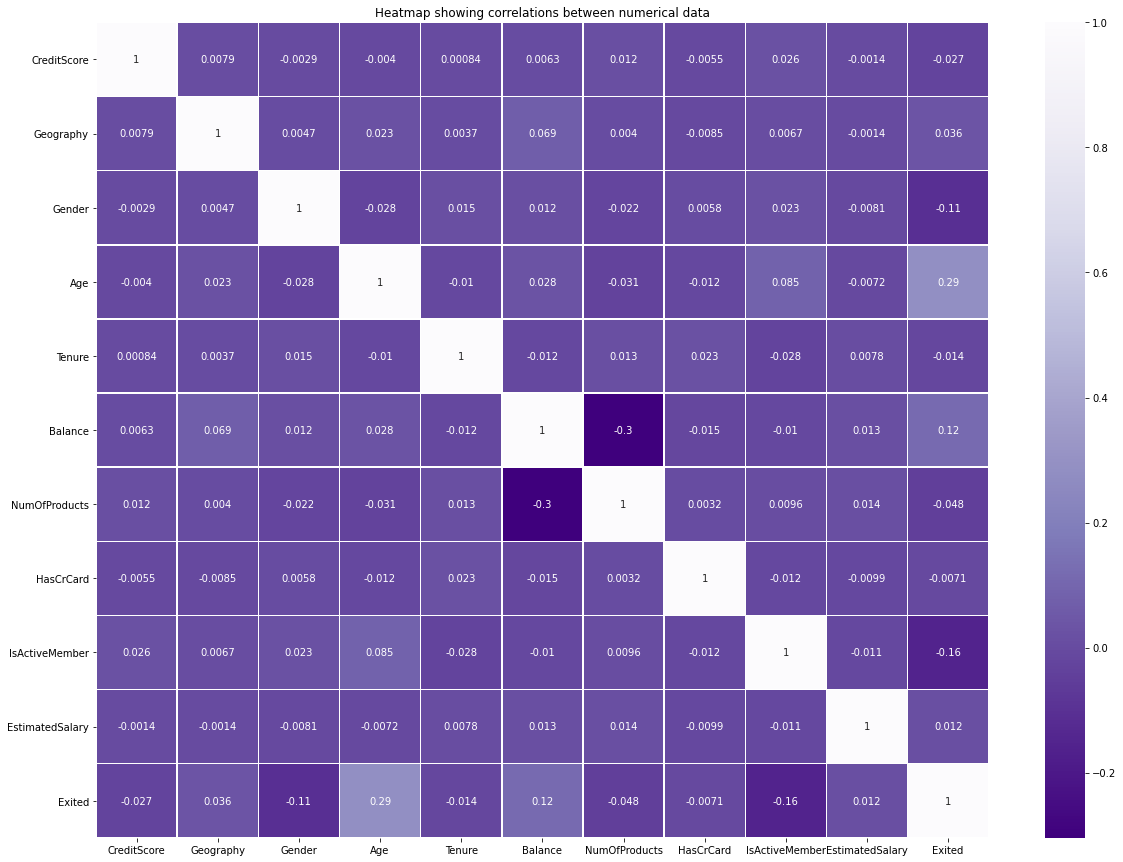

In [136]:
plt.figure(figsize=(20,15))  
sns.heatmap(df.corr(),annot=True,linewidths=.5, cmap="Purples_r")
plt.title('Heatmap showing correlations between numerical data')
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f741b448208>,
      dtype=object)

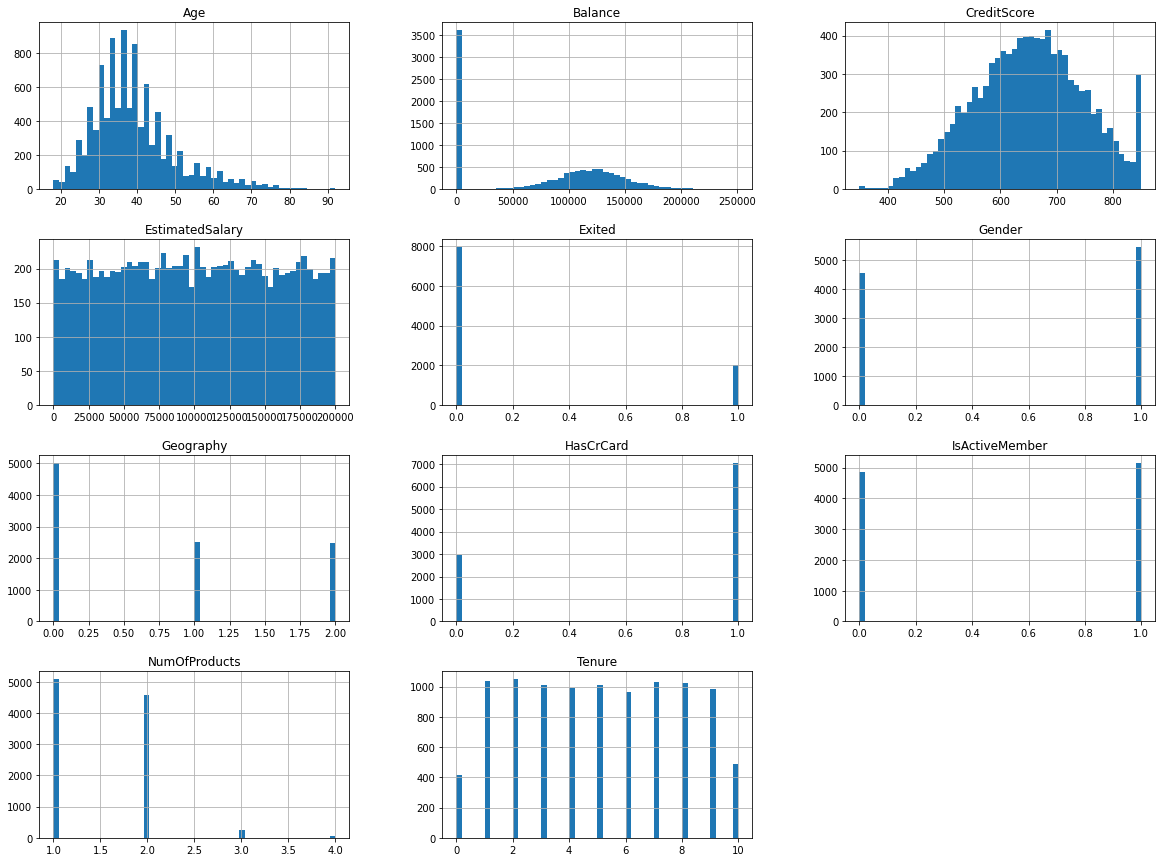

In [137]:
df.hist(bins=50,figsize=(20,15))

In [138]:
def checking_surname(df):
    check = dict()
    for i in range(len(df.Exited)):
        if df['Surname'][i] in check:
            if df['Exited'][i] == 1:
                check[df['Surname'][i]][0] += 1
            else:
                check[df['Surname'][i]][1] += 1
        else:
            if df['Exited'][i]:
                check[df['Surname'][i]] = [2, 1]
            else:
                check[df['Surname'][i]] = [1, 2]
    return check

In [139]:
def preprocessing(check):
    check2 = dict()
    for i in check:
        if check[i][0] + check[i][1] > 4 and ((check[i][0] / check[i][1] > 4) or (check[i][1] / check[i][0] > 4)):
            check2[i] = [check[i][0], check[i][1]]
    return check2

In [140]:
check = preprocessing(checking_surname(df))
check

{'Hill': [3, 16],
 'Mitchell': [3, 19],
 'Chu': [4, 20],
 'H?': [2, 19],
 'Andrews': [1, 7],
 'Kay': [1, 6],
 'Scott': [4, 27],
 'Dellucci': [1, 14],
 'Young': [2, 20],
 'Nebechi': [1, 7],
 'Odinakachukwu': [1, 5],
 'Clements': [1, 10],
 'Lombardo': [3, 14],
 'Clarke': [5, 1],
 'Bianchi': [1, 11],
 'Tyler': [1, 5],
 'Buccho': [1, 15],
 "O'Brien": [1, 5],
 'Tsao': [2, 17],
 "T'ien": [3, 17],
 'Clark': [2, 16],
 'Jackson': [2, 9],
 'Palermo': [2, 12],
 'Wallace': [3, 18],
 'Hu': [2, 12],
 'Mills': [1, 8],
 'Onyeorulu': [1, 6],
 'Capon': [2, 14],
 'Graham': [4, 18],
 'Parsons': [1, 7],
 'Chiemela': [1, 6],
 'Duncan': [3, 18],
 'Wu': [3, 15],
 'Zetticci': [1, 12],
 'Alekseeva': [1, 5],
 'Chukwufumnanya': [1, 6],
 'Wilkinson': [1, 5],
 'Wei': [4, 17],
 'Wood': [3, 14],
 'Sun': [4, 19],
 'Ho': [1, 12],
 'Ogbonnaya': [1, 6],
 'Marshall': [2, 15],
 'Moran': [1, 8],
 'Chiemezie': [1, 5],
 'Collins': [1, 6],
 'Trevisano': [3, 15],
 'Millar': [2, 13],
 'Yang': [2, 13],
 "Ch'ien": [2, 13],
 'Catta

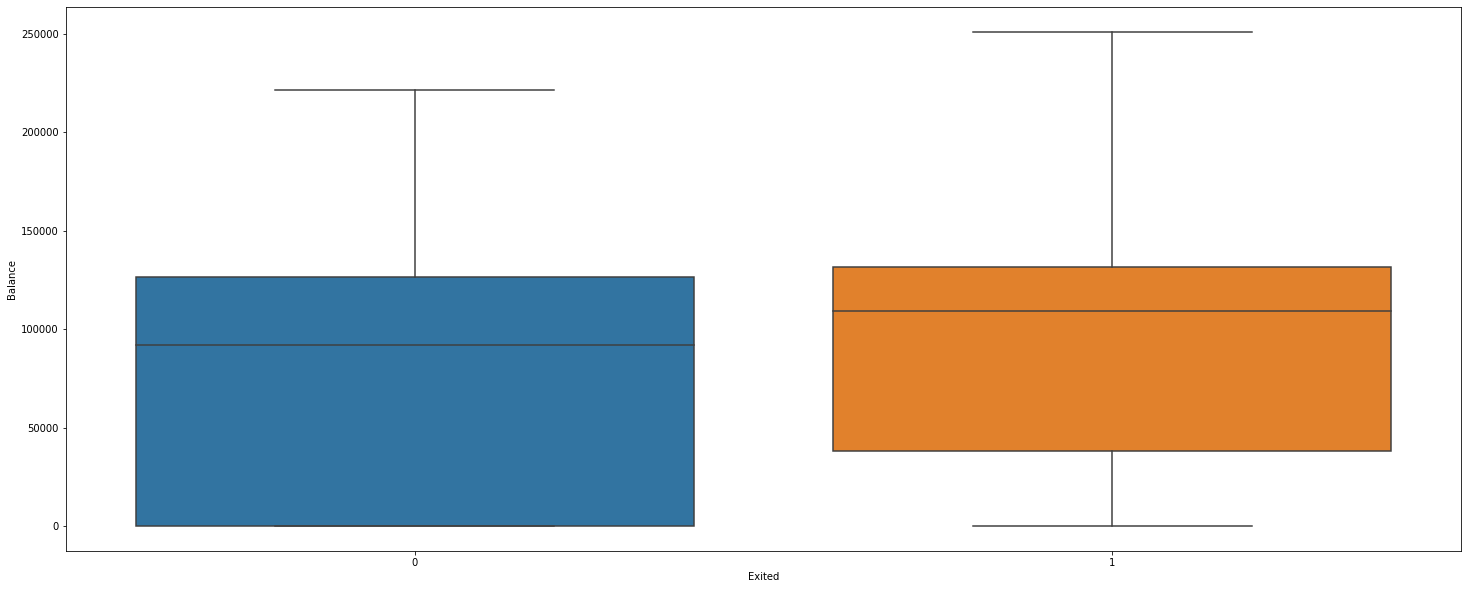

In [142]:
plt.figure(figsize=(25, 10))
sns.boxplot(x="Exited", y="Balance", data=df)

In [151]:
plt.figure(figsize=(25,10))
sns.boxplot(x="Exited",y="Age", hue='Geography',data=df)
plt.show()

ValueError: Could not interpret input 'age'

<Figure size 1800x720 with 0 Axes>